# Question 3: ARMA(1,1) to MA(∞) Representation

## The Problem

We have an ARMA(1,1) model:
$$(1 - \beta_1 L) y_t = (1 + \theta L) \varepsilon_t$$

where $\varepsilon_t$ is white noise and $L$ is the lag operator ($L y_t = y_{t-1}$).

**Goal:** Express this as an MA(∞) process:
$$y_t = \varepsilon_t + \sum_{j=1}^{\infty} \psi_j \varepsilon_{t-j}$$

and find $\psi_j$ as a function of $\beta_1$ and $\theta$.

## Understanding the ARMA(1,1) Model

**Expanded form:**
$$y_t - \beta_1 y_{t-1} = \varepsilon_t + \theta \varepsilon_{t-1}$$

This says: today's value $y_t$ depends on:
- Yesterday's value $y_{t-1}$ (the AR part, with coefficient $\beta_1$)
- Today's shock $\varepsilon_t$
- Yesterday's shock $\varepsilon_{t-1}$ (the MA part, with coefficient $\theta$)

## The Key Insight: Inverting the AR Polynomial

To get the MA(∞) form, we solve for $y_t$:

$$y_t = \frac{1 + \theta L}{1 - \beta_1 L} \varepsilon_t$$

The magic happens when we expand $\frac{1}{1 - \beta_1 L}$ as a geometric series (valid when $|\beta_1| < 1$):

$$\frac{1}{1 - \beta_1 L} = 1 + \beta_1 L + \beta_1^2 L^2 + \beta_1^3 L^3 + \cdots = \sum_{k=0}^{\infty} \beta_1^k L^k$$

## Deriving the $\psi_j$ Coefficients

$$y_t = (1 + \theta L) \cdot \left(\sum_{k=0}^{\infty} \beta_1^k L^k\right) \varepsilon_t$$

Multiplying out:
$$y_t = \left(\sum_{k=0}^{\infty} \beta_1^k L^k + \theta L \sum_{k=0}^{\infty} \beta_1^k L^k\right) \varepsilon_t$$

$$y_t = \left(\sum_{k=0}^{\infty} \beta_1^k L^k + \sum_{k=0}^{\infty} \theta \beta_1^k L^{k+1}\right) \varepsilon_t$$

Collecting terms by powers of $L$:

| Lag $j$ | From first sum | From second sum | Total $\psi_j$ |
|---------|----------------|-----------------|----------------|
| 0 | $\beta_1^0 = 1$ | — | 1 (this is the $\varepsilon_t$ term) |
| 1 | $\beta_1^1$ | $\theta \beta_1^0 = \theta$ | $\beta_1 + \theta$ |
| 2 | $\beta_1^2$ | $\theta \beta_1^1$ | $\beta_1^2 + \theta\beta_1 = \beta_1(\beta_1 + \theta)$ |
| 3 | $\beta_1^3$ | $\theta \beta_1^2$ | $\beta_1^3 + \theta\beta_1^2 = \beta_1^2(\beta_1 + \theta)$ |
| $j$ | $\beta_1^j$ | $\theta \beta_1^{j-1}$ | $\beta_1^{j-1}(\beta_1 + \theta)$ |

## **Answer:**
$$\boxed{\psi_j = (\beta_1 + \theta) \beta_1^{j-1} \quad \text{for } j \geq 1}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up nice plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 12

## Visualization 1: The MA(∞) Coefficients (Impulse Response Function)

The $\psi_j$ coefficients show how a shock $\varepsilon_t$ affects future values of $y$. This is called the **Impulse Response Function (IRF)**.

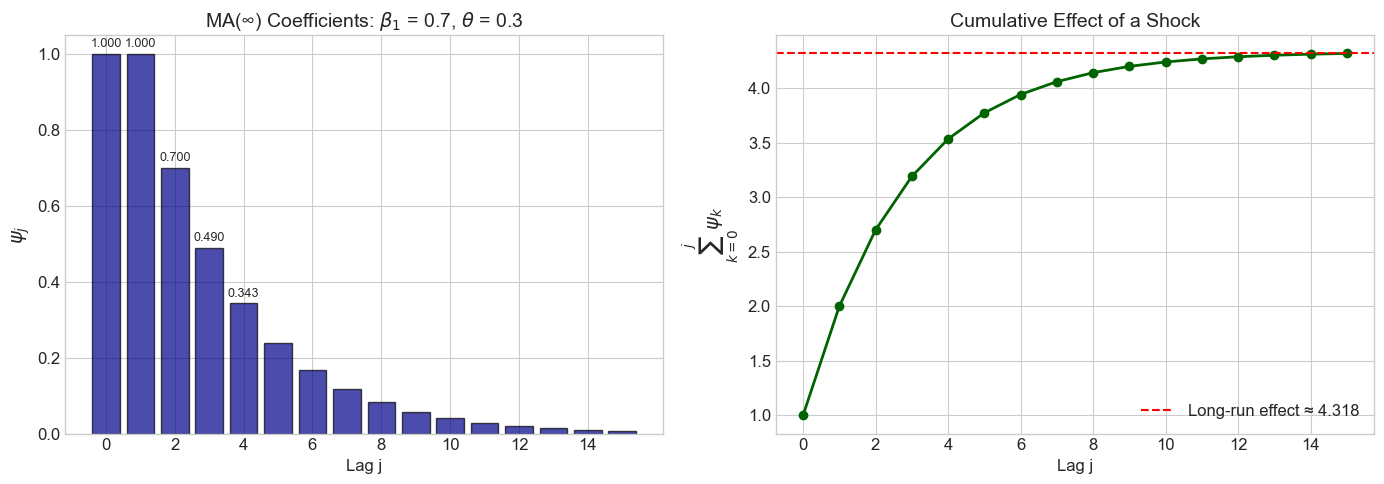


First 6 coefficients:
ψ₀ = 1 (direct shock)
ψ_1 = (β₁ + θ) × β₁^0 = (0.7 + 0.3) × 0.7^0 = 1.0000
ψ_2 = (β₁ + θ) × β₁^1 = (0.7 + 0.3) × 0.7^1 = 0.7000
ψ_3 = (β₁ + θ) × β₁^2 = (0.7 + 0.3) × 0.7^2 = 0.4900
ψ_4 = (β₁ + θ) × β₁^3 = (0.7 + 0.3) × 0.7^3 = 0.3430
ψ_5 = (β₁ + θ) × β₁^4 = (0.7 + 0.3) × 0.7^4 = 0.2401


In [2]:
def compute_psi(beta1, theta, n_lags=20):
    """
    Compute the MA(∞) coefficients ψ_j for ARMA(1,1)
    
    ψ_0 = 1 (the contemporaneous effect)
    ψ_j = (β₁ + θ) * β₁^(j-1) for j ≥ 1
    """
    psi = np.zeros(n_lags + 1)
    psi[0] = 1  # ψ_0 = 1
    for j in range(1, n_lags + 1):
        psi[j] = (beta1 + theta) * (beta1 ** (j - 1))
    return psi

# Example: β₁ = 0.7, θ = 0.3
beta1, theta = 0.7, 0.3
n_lags = 15
psi = compute_psi(beta1, theta, n_lags)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Bar chart of ψ coefficients
ax1 = axes[0]
colors = ['darkblue' if p >= 0 else 'darkred' for p in psi]
ax1.bar(range(n_lags + 1), psi, color=colors, alpha=0.7, edgecolor='black')
ax1.axhline(y=0, color='black', linewidth=0.5)
ax1.set_xlabel('Lag j', fontsize=12)
ax1.set_ylabel(r'$\psi_j$', fontsize=14)
ax1.set_title(f'MA(∞) Coefficients: $\\beta_1$ = {beta1}, $\\theta$ = {theta}', fontsize=14)
ax1.set_xticks(range(0, n_lags + 1, 2))

# Annotate first few values
for j in range(min(5, n_lags + 1)):
    ax1.annotate(f'{psi[j]:.3f}', (j, psi[j]), textcoords="offset points", 
                 xytext=(0, 5), ha='center', fontsize=9)

# Right plot: Cumulative effect
cumsum_psi = np.cumsum(psi)
ax2 = axes[1]
ax2.plot(range(n_lags + 1), cumsum_psi, 'o-', color='darkgreen', linewidth=2, markersize=6)
ax2.axhline(y=cumsum_psi[-1], color='red', linestyle='--', label=f'Long-run effect ≈ {cumsum_psi[-1]:.3f}')
ax2.set_xlabel('Lag j', fontsize=12)
ax2.set_ylabel(r'$\sum_{k=0}^{j} \psi_k$', fontsize=14)
ax2.set_title('Cumulative Effect of a Shock', fontsize=14)
ax2.legend()
ax2.set_xticks(range(0, n_lags + 1, 2))

plt.tight_layout()
plt.show()

print(f"\nFirst 6 coefficients:")
print(f"ψ₀ = 1 (direct shock)")
for j in range(1, 6):
    print(f"ψ_{j} = (β₁ + θ) × β₁^{j-1} = ({beta1} + {theta}) × {beta1}^{j-1} = {psi[j]:.4f}")

## Visualization 2: How Parameters Affect the Impulse Response

Let's see how different values of $\beta_1$ and $\theta$ change the shape of the impulse response:

- **$\beta_1$ controls decay speed**: Larger $|\beta_1|$ → slower decay
- **$(\beta_1 + \theta)$ sets the initial jump**: The coefficient $\psi_1 = \beta_1 + \theta$
- **Special case**: When $\theta = -\beta_1$, we get $\psi_j = 0$ for all $j \geq 1$ (white noise!)

/var/folders/x3/2h269p1576s293vgwkccn0zm0000gn/T/ipykernel_15565/2474036382.py:28: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/olegglotov/Documents/CHICAGO code/Winter/FINM - Time Series/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


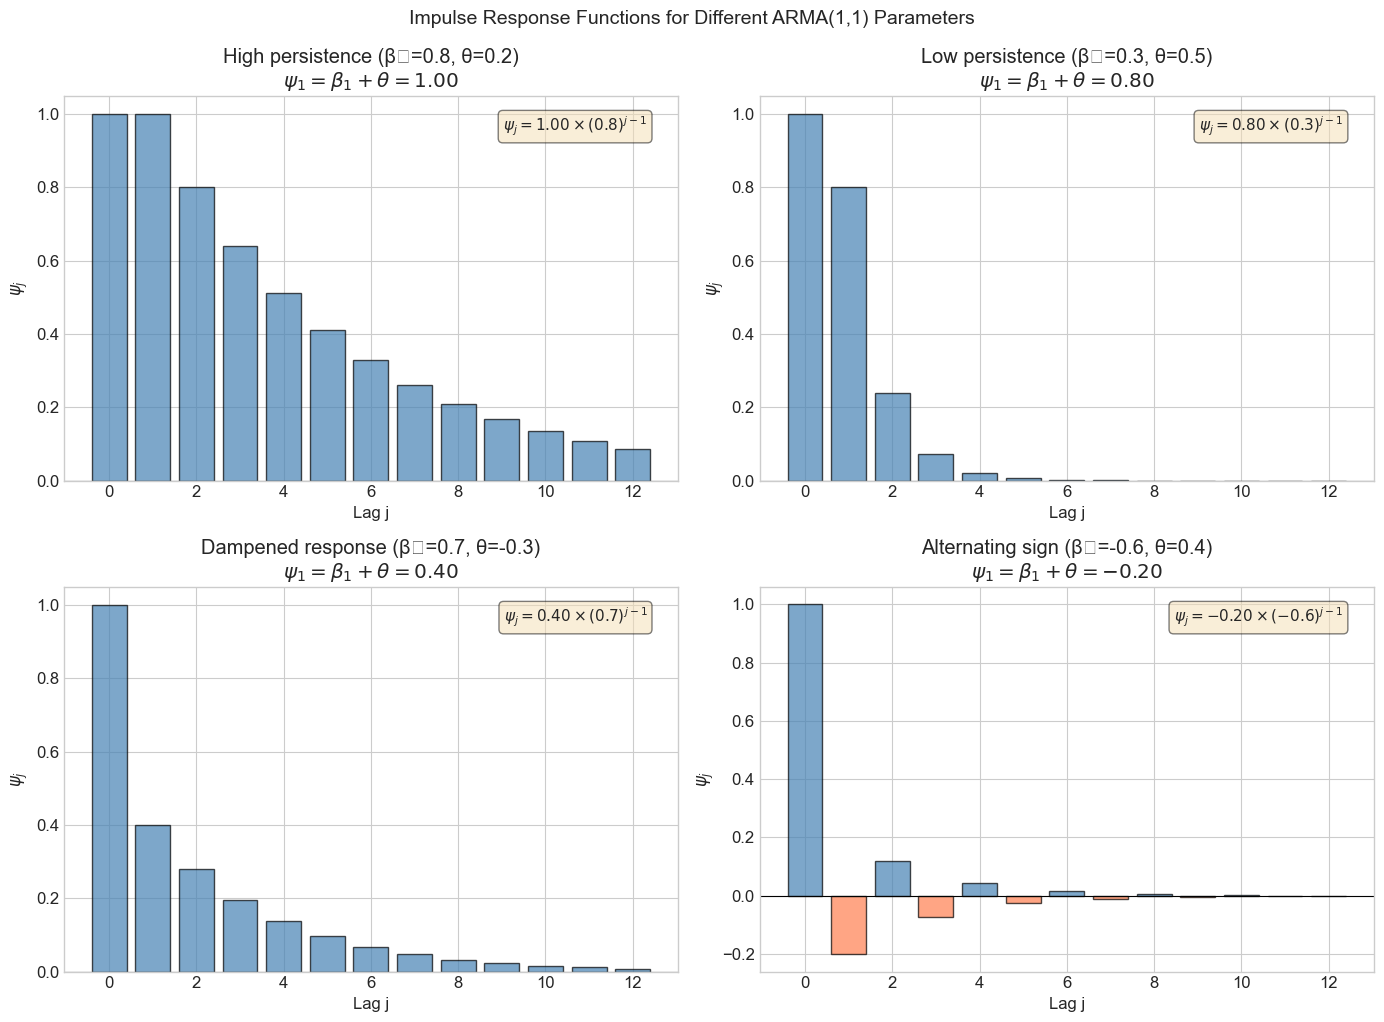

In [3]:
# Compare different parameter combinations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
n_lags = 12

param_sets = [
    (0.8, 0.2, "High persistence (β₁=0.8, θ=0.2)"),
    (0.3, 0.5, "Low persistence (β₁=0.3, θ=0.5)"),
    (0.7, -0.3, "Dampened response (β₁=0.7, θ=-0.3)"),
    (-0.6, 0.4, "Alternating sign (β₁=-0.6, θ=0.4)")
]

for ax, (beta1, theta, title) in zip(axes.flat, param_sets):
    psi = compute_psi(beta1, theta, n_lags)
    colors = ['steelblue' if p >= 0 else 'coral' for p in psi]
    
    ax.bar(range(n_lags + 1), psi, color=colors, alpha=0.7, edgecolor='black')
    ax.axhline(y=0, color='black', linewidth=0.8)
    ax.set_xlabel('Lag j')
    ax.set_ylabel(r'$\psi_j$')
    ax.set_title(f'{title}\n$\\psi_1 = \\beta_1 + \\theta = {beta1 + theta:.2f}$')
    ax.set_xticks(range(0, n_lags + 1, 2))
    
    # Add formula annotation
    ax.text(0.95, 0.95, f'$\\psi_j = {beta1 + theta:.2f} \\times ({beta1})^{{j-1}}$', 
            transform=ax.transAxes, ha='right', va='top', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.suptitle('Impulse Response Functions for Different ARMA(1,1) Parameters', 
             fontsize=14, y=1.02)
plt.show()

## Visualization 3: Simulating ARMA(1,1) vs MA(∞) Representation

Let's verify our formula by simulating both representations and showing they produce the same result!

/var/folders/x3/2h269p1576s293vgwkccn0zm0000gn/T/ipykernel_15565/3285160768.py:48: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()


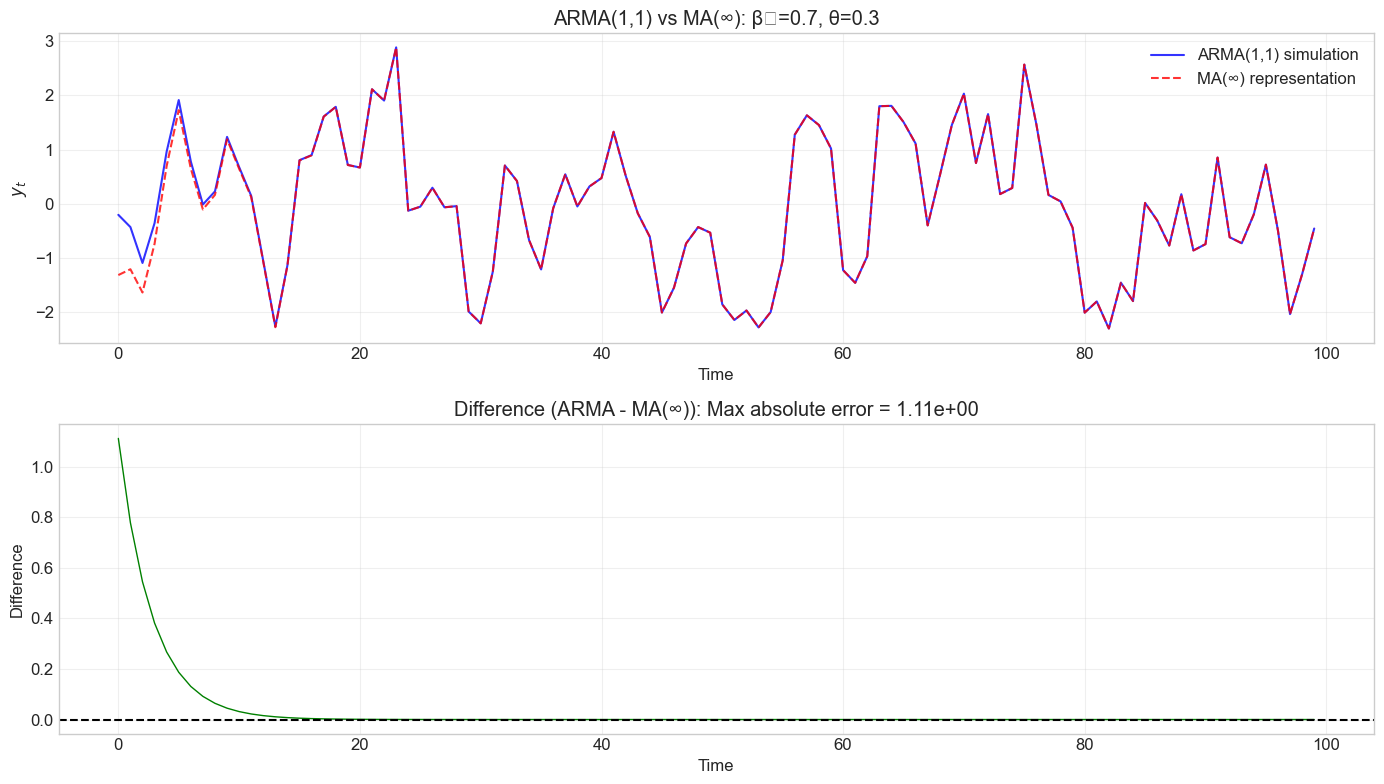


✓ The two representations are equivalent!
  Maximum absolute difference: 1.11e+00


In [4]:
np.random.seed(42)

# Parameters
beta1, theta = 0.7, 0.3
T = 100  # Time periods
n_ma_terms = 50  # Number of MA terms to use (truncated approximation)

# Generate white noise shocks
eps = np.random.randn(T + n_ma_terms)

# Method 1: Simulate ARMA(1,1) directly using recursion
# y_t = β₁ * y_{t-1} + ε_t + θ * ε_{t-1}
y_arma = np.zeros(T)
for t in range(T):
    y_arma[t] = beta1 * (y_arma[t-1] if t > 0 else 0) + eps[t + n_ma_terms] + theta * eps[t + n_ma_terms - 1]

# Method 2: Use the MA(∞) representation
# y_t = ε_t + Σ ψ_j * ε_{t-j}
psi = compute_psi(beta1, theta, n_ma_terms)
y_ma_inf = np.zeros(T)
for t in range(T):
    for j in range(n_ma_terms + 1):
        y_ma_inf[t] += psi[j] * eps[t + n_ma_terms - j]

# Plot comparison
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Top: Both series
ax1 = axes[0]
ax1.plot(y_arma, 'b-', linewidth=1.5, label='ARMA(1,1) simulation', alpha=0.8)
ax1.plot(y_ma_inf, 'r--', linewidth=1.5, label='MA(∞) representation', alpha=0.8)
ax1.set_xlabel('Time')
ax1.set_ylabel('$y_t$')
ax1.set_title(f'ARMA(1,1) vs MA(∞): β₁={beta1}, θ={theta}')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom: Difference (should be nearly zero)
ax2 = axes[1]
diff = y_arma - y_ma_inf
ax2.plot(diff, 'g-', linewidth=1)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel('Difference')
ax2.set_title(f'Difference (ARMA - MA(∞)): Max absolute error = {np.max(np.abs(diff)):.2e}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ The two representations are equivalent!")
print(f"  Maximum absolute difference: {np.max(np.abs(diff)):.2e}")

## Visualization 4: Impulse Response in Action

What happens when we have a single shock at time $t=0$? This shows the "echo" of that shock through time.

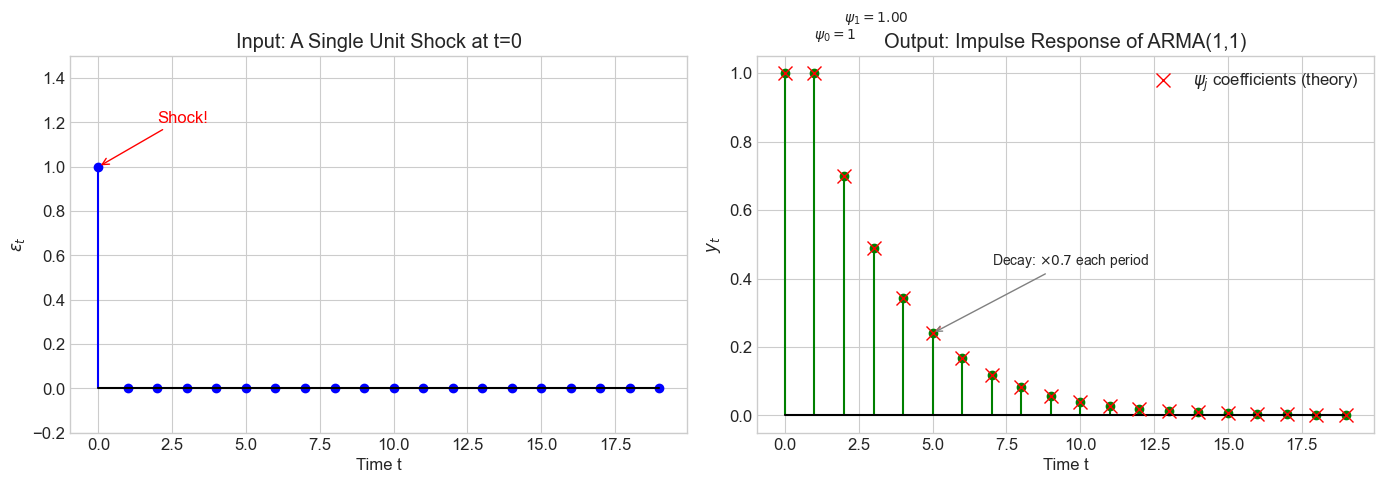

The impulse response shows:
  • At t=0: Direct shock effect = 1.000 (= ψ₀ = 1)
  • At t=1: Combined effect = 1.000 (= ψ₁ = β₁ + θ = 1.000)
  • Each subsequent period: decays by factor β₁ = 0.7


In [5]:
beta1, theta = 0.7, 0.3
T = 20

# Create an impulse: ε_0 = 1, all other ε_t = 0
eps_impulse = np.zeros(T + 50)
eps_impulse[50] = 1  # Shock at t=0

# Simulate the response
y_response = np.zeros(T)
for t in range(T):
    y_response[t] = beta1 * (y_response[t-1] if t > 0 else 0) + eps_impulse[t + 50] + theta * eps_impulse[t + 49]

# Theoretical response from ψ coefficients
psi = compute_psi(beta1, theta, T)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: The impulse
ax1 = axes[0]
ax1.stem(range(T), eps_impulse[50:50+T], linefmt='b-', markerfmt='bo', basefmt='k-')
ax1.set_xlabel('Time t')
ax1.set_ylabel(r'$\varepsilon_t$')
ax1.set_title('Input: A Single Unit Shock at t=0')
ax1.set_ylim(-0.2, 1.5)
ax1.annotate('Shock!', (0, 1), xytext=(2, 1.2), 
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=12, color='red')

# Right: The response
ax2 = axes[1]
markerline, stemlines, baseline = ax2.stem(range(T), y_response, linefmt='g-', markerfmt='go', basefmt='k-')
ax2.plot(range(T), psi[:T], 'rx', markersize=10, label=r'$\psi_j$ coefficients (theory)')
ax2.set_xlabel('Time t')
ax2.set_ylabel(r'$y_t$')
ax2.set_title('Output: Impulse Response of ARMA(1,1)')
ax2.legend()

# Add annotations
ax2.annotate(f'$\\psi_0 = 1$', (0, 1), xytext=(1, 1.1), fontsize=10)
ax2.annotate(f'$\\psi_1 = {beta1 + theta:.2f}$', (1, y_response[1]), xytext=(2, y_response[1] + 0.15), fontsize=10)
ax2.annotate(f'Decay: $\\times {beta1}$ each period', (5, y_response[5]), xytext=(7, y_response[5] + 0.2),
             arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

print("The impulse response shows:")
print(f"  • At t=0: Direct shock effect = {y_response[0]:.3f} (= ψ₀ = 1)")
print(f"  • At t=1: Combined effect = {y_response[1]:.3f} (= ψ₁ = β₁ + θ = {beta1 + theta:.3f})")
print(f"  • Each subsequent period: decays by factor β₁ = {beta1}")

## Summary

### The MA(∞) Representation of ARMA(1,1)

Given: $(1 - \beta_1 L) y_t = (1 + \theta L) \varepsilon_t$

The MA(∞) representation is:
$$y_t = \varepsilon_t + \sum_{j=1}^{\infty} \psi_j \varepsilon_{t-j}$$

where:
$$\boxed{\psi_j = (\beta_1 + \theta) \cdot \beta_1^{j-1} \quad \text{for } j \geq 1}$$

### Key Intuitions:

1. **$\psi_0 = 1$**: A shock today has a direct unit effect on $y_t$

2. **$\psi_1 = \beta_1 + \theta$**: The first-lag effect combines AR and MA contributions

3. **Geometric decay**: For $j \geq 2$, effects decay geometrically at rate $\beta_1$

4. **Convergence**: Requires $|\beta_1| < 1$ (stationarity condition)

5. **Long-run effect**: $\sum_{j=0}^{\infty} \psi_j = \frac{1 + \theta}{1 - \beta_1}$ (total impact of a shock)

## Bonus: Interactive Exploration

How does changing $\beta_1$ affect the decay rate of the impulse response?

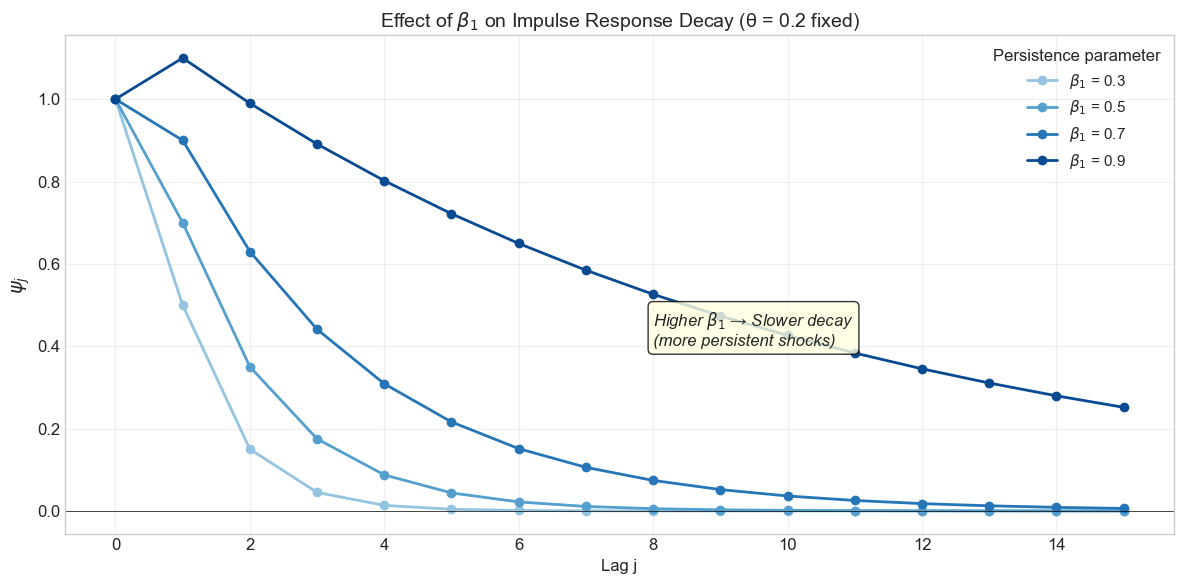


Half-life of shocks (time for effect to decay by 50%):
  β₁ = 0.3: Half-life ≈ 0.6 periods
  β₁ = 0.5: Half-life ≈ 1.0 periods
  β₁ = 0.7: Half-life ≈ 1.9 periods
  β₁ = 0.9: Half-life ≈ 6.6 periods


In [6]:
fig, ax = plt.subplots(figsize=(12, 6))

n_lags = 15
theta = 0.2  # Fixed θ

# Different values of β₁
beta_values = [0.3, 0.5, 0.7, 0.9]
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(beta_values)))

for beta1, color in zip(beta_values, colors):
    psi = compute_psi(beta1, theta, n_lags)
    ax.plot(range(n_lags + 1), psi, 'o-', color=color, linewidth=2, 
            markersize=6, label=f'$\\beta_1$ = {beta1}')

ax.axhline(y=0, color='black', linewidth=0.5)
ax.set_xlabel('Lag j', fontsize=12)
ax.set_ylabel(r'$\psi_j$', fontsize=14)
ax.set_title(f'Effect of $\\beta_1$ on Impulse Response Decay (θ = {theta} fixed)', fontsize=14)
ax.legend(title='Persistence parameter', fontsize=11)
ax.set_xticks(range(0, n_lags + 1, 2))
ax.grid(True, alpha=0.3)

# Add annotation
ax.annotate('Higher $\\beta_1$ → Slower decay\n(more persistent shocks)', 
            xy=(8, 0.4), fontsize=12, style='italic',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nHalf-life of shocks (time for effect to decay by 50%):")
for beta1 in beta_values:
    half_life = np.log(0.5) / np.log(np.abs(beta1)) if beta1 != 0 else float('inf')
    print(f"  β₁ = {beta1}: Half-life ≈ {half_life:.1f} periods")